In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
ps = np.zeros((2, 64))
ps[0] = np.array([
    1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, -1, -1, -1, -1, 1, 1,
    1, 1, -1, -1, -1, -1, 1, 1,
    1, 1, -1, -1, -1, -1, 1, 1,
    1, 1, -1, -1, -1, -1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1,
])
ps[1] = np.array([
    -1, -1, 1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
    -1, -1, -1, 1, 1, -1, -1, -1,
])

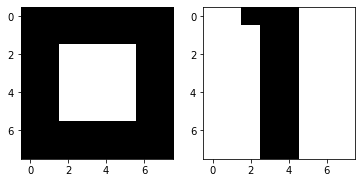

In [128]:
fig, axs = plt.subplots(1, 2)
for i in range(ps.shape[0]):
    axs[i].imshow(np.reshape(ps[i], (8, 8)), cmap=plt.cm.gray_r)

In [129]:
def init_weights(input_vectors):
    weights = np.zeros((input_vectors.shape[1], input_vectors.shape[1]))
    for i in range(input_vectors.shape[0]):
        a = input_vectors[i]
        a = np.expand_dims(a, 1)
        weights += np.matmul(a, a.T)
    for i in range(input_vectors.shape[1]):
        weights[i][i] = 0
    return weights

In [130]:
weights = init_weights(ps)

In [131]:
def activate(yi, theta=0):
    if yi > theta:
        return 1
    else:
        return -1

In [136]:
def predict(input_image, weights):
    history = np.zeros((input_image.shape[0]))
    y = input_image
    converged = False
    while not converged:
        random_indices = np.random.permutation(np.arange(len(input_image)))
        for index in random_indices:
            y[index] = input_image[index] + np.dot(y, weights[index])
            y[index] = activate(y[index])
        if (y != history).any():
            converged = True
        history = y
        if converged:
            print('successfully converged!!')
            break
    return history

In [142]:
for i in range(ps.shape[0]):
    input_image = ps[i]
    history = predict(input_image, weights)
    print((history == ps[i]).all())

successfully converged!!
True
successfully converged!!
True


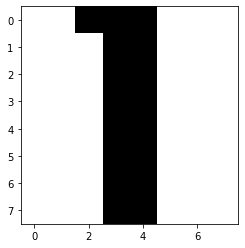

In [144]:
plt.imshow(history.reshape([8, 8]), cmap=plt.cm.gray_r)

### Adding noise to the images

In [147]:
def add_noise(a, prob):
    a = a.copy()
    choices = np.random.choice(np.arange(a.shape[0]), size=int(prob*a.shape[0]), replace=False)
    for choice in choices:
        a[choice] *= -1
    return a

In [160]:
def compute_hamming_distance(a, b):
    return len(np.where(a != b)[0])

In [159]:
predictions = []
for i in range(ps.shape[0]):
    input_image = ps[i]
    input_image = add_noise(input_image, .3)
    history = predict(input_image, weights)
    predictions.append(history)
    print((history == ps[i]).all())

successfully converged!!
True
successfully converged!!
True


In [162]:
hamming_distances = np.zeros([2, 10])
for noise_index, noise in enumerate(np.linspace(0, 1, num=10)):
    for i in range(ps.shape[0]):
        input_image = ps[i]
        input_image = add_noise(input_image, noise)
        history = predict(input_image, weights)
        hamming_distances[i, noise_index] = compute_hamming_distance(history, ps[i])

successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!
successfully converged!!


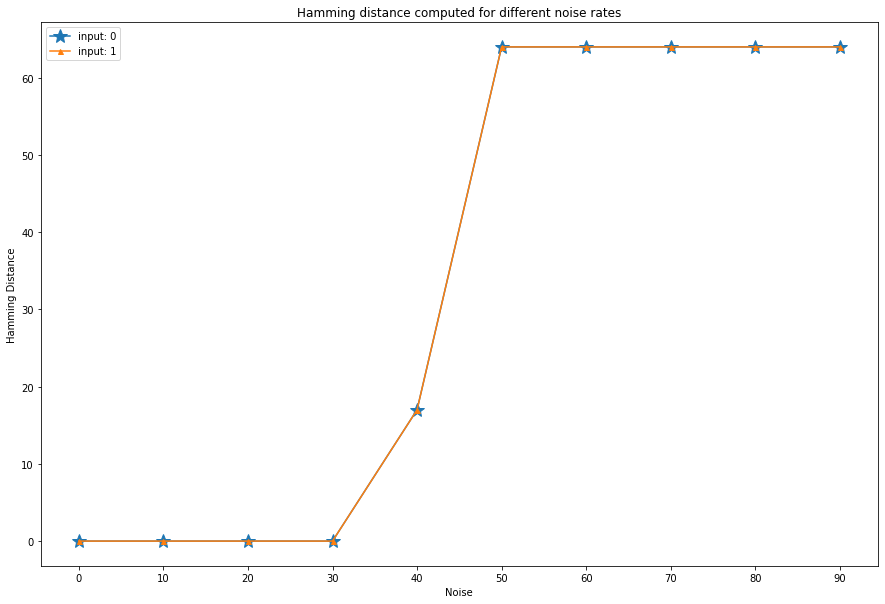

In [190]:
plt.figure(figsize=(15, 10))
plt.plot(hamming_distances[0], label='input: 0', marker='*', markersize=15)
plt.plot(hamming_distances[1], label='input: 1', marker='^', markersize=5)
plt.xticks(np.arange(10))
plt.gca().set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.legend()
plt.xlabel('Noise')
plt.ylabel('Hamming Distance')
plt.title('Hamming distance computed for different noise rates')
plt.show()